# Master in Data Science. Final Project

# Flight passenger satisfaction analysis and prediction

## Dataset and project aim
 *What:* This dataset describes customer satisfaction based on pre-flight, in-flight and post-flight services and related events. <br>
*To do:* The aim is to build a Machine Learning model to predict either the customer is satisfied with the service or not. <br>

*Storytelling:*

We are living in the age where we make purchases, book services and use tools gladly relying on the other customer reviews. <br>
The satisfaction of customers directly affects company's reputation and profitability.
Bad customer experience costs dozens times more to a company than that of a happy customer. Therefore it is vital for businesses to keep up to the standards, constantly monitor the customer satisfaction, and gain a comprehensive understanding to work on the improvements. <br>
Timely discover weak points of service may help from loosing clients and a decrease of reputation.<br>
**Customer satisfaction is what lies between the company and it's competitor.**

In [799]:
# Import moduls

import numpy as np
import pandas as pd

import statistics as st
from statistics import mean

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import catboost as cb
from catboost import CatBoostClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [800]:
data = pd.read_csv('train.csv')

In [801]:
data_test = pd.read_csv('test.csv')

In [802]:
pd.set_option('display.max_columns', None)
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [803]:
data_test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [804]:
# Uniting train and test datasets for the preprocessing

In [805]:
frames = [data, data_test]
df = pd.concat(frames)

In [806]:
# United dataframe 
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


## 1. Data cleaning

#### 1.1. Checking and replacing null values

In [807]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      12988

In [808]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [809]:
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna("0").astype(int)

In [810]:
# checking
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

#### 1.2. Drop the columns we don't need

In [811]:
df = df.drop(['Unnamed: 0','id'], axis=1)

## 2. Exploratory Data Analysis

Now as we have clean dataset let's take a detailed look at the data.

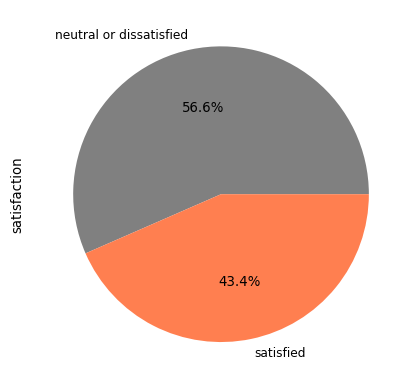

In [812]:
# Satisfied or not
colors=['grey','coral']
df.satisfaction.value_counts().plot(kind='pie', colors=colors, autopct='%1.1f%%');

### Ouch! More than a half of the customers are unhappy with the service. 
Let's dive deeper.

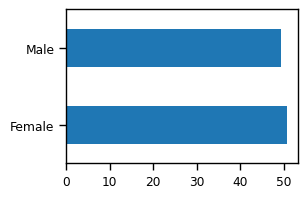

In [824]:
# Gender distribution, in percent
fig, ax = plt.subplots(figsize=(3, 2))
(df['Gender'].value_counts(normalize=True) * 100).plot(kind='barh', ax=ax);

Female and male distribution is almost 50/50.

In [814]:
df['Customer Type'].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

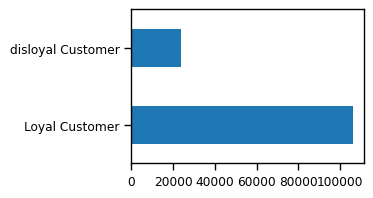

In [826]:
fig, ax = plt.subplots(figsize=(3, 2))
df['Customer Type'].value_counts().plot(kind='barh', ax=ax);

There are almost 5 times more loyal customers than disloyal. Which is even more surprising, given the fact than a better half of them is unhappy about the service..

#### Check out for the correlation between type of travel, class and satisfaction:

In [514]:
tr_class = pd.DataFrame(df.groupby('Type of Travel')['satisfaction'].value_counts())
tr_class

satisfaction
Type of Travel  satisfaction                         
Business travel satisfied                       52356
                neutral or dissatisfied         37337
Personal Travel neutral or dissatisfied         36115
                satisfied                        4072

Outcome: Business travellers are more often happy than non, meanwhile situation with private travels is quite dramatic. Does it maybe depend on a Travel class?

In [515]:
tr_class = pd.DataFrame(df.groupby('Class', as_index=False)['satisfaction'].value_counts())
tr_class

,Class,satisfaction,count
0,Business,satisfied,43166
1,Business,neutral or dissatisfied,18994
2,Eco,neutral or dissatisfied,47366
3,Eco,satisfied,10943
4,Eco Plus,neutral or dissatisfied,7092
5,Eco Plus,satisfied,2319


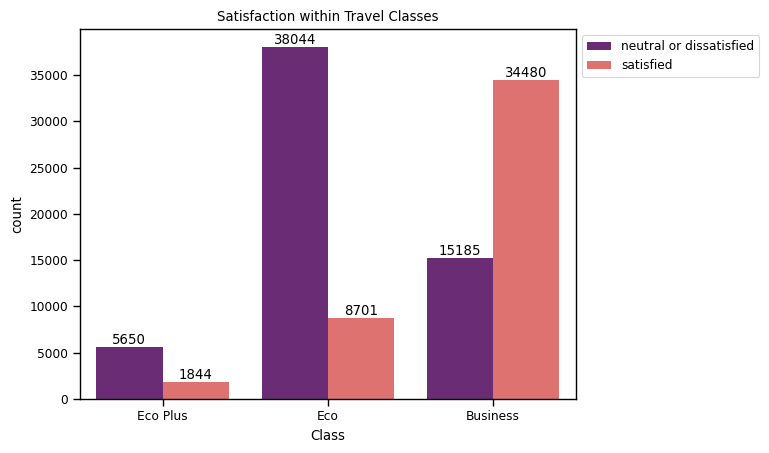

In [516]:
ax = sns.countplot(x = 'Class', hue = 'satisfaction', data = data, palette = 'magma', 
                   order = data['Class'].value_counts(ascending=True).index)

for label in ax.containers:
    ax.bar_label(label)
    
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Satisfaction within Travel Classes')
plt.show()

And indeed, it **does** depend on travel class. Lowers the class, lowers the satisfaction. <br> So what is so different within offer that makes such huge difference?<br>
Let's see what services customers appreciated the most:

In [517]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [518]:
services = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']].mean().sort_values(ascending=True)

In [519]:
srv = pd.DataFrame({'Services':services.index, 'Rate':services.values})
srv

,Services,Rate
0,Inflight wifi service,2.728696
1,Ease of Online booking,2.756876
2,Gate location,2.976925
3,Departure/Arrival time convenient,3.057599
4,Food and drink,3.204774
5,Online boarding,3.252633
6,Cleanliness,3.286326
7,Checkin service,3.306267
8,Leg room service,3.350878
9,Inflight entertainment,3.358077


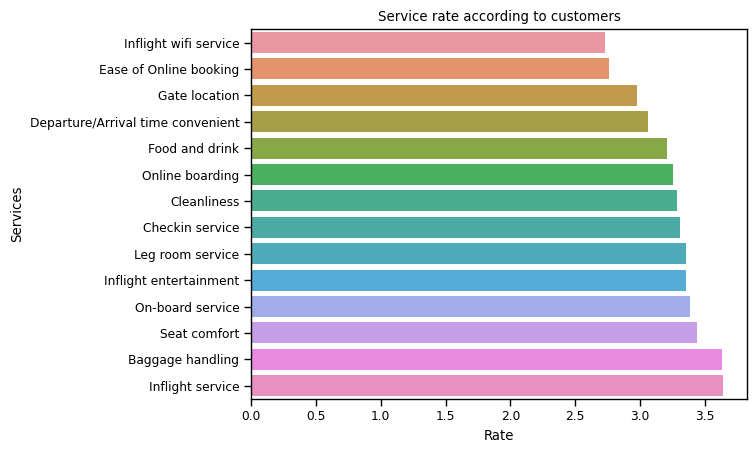

In [520]:
sns.barplot(data=srv, x="Rate", y="Services", orient='h');
plt.title('Service rate according to customers');

As per visualisation, **baggage handling** and **inflight service** are two aspects that received higher votes from passengers.

Internet: The term "inflight service" typically refers to the broader range of services available to passengers throughout the entire duration of the flight. This includes everything from boarding and pre-flight preparations to disembarkation at the destination. Inflight service encompasses various aspects such as cabin crew interactions, meal service, beverage service, entertainment systems, and any other services offered during the flight.

That said, many other services can be improved: ease of online booking, cleanliness, food and drink, departure/arrival time convenience. Some of them are easier to improve than the others.

**Let's see how the satisfaction level is affected by travel distance:**

Let's get the top 10 destinations by travelers quantity:

In [521]:
# Group by 'Flight Distance' and calculate the totals for 'Satisfaction' column
grouped_df = df.groupby('Flight Distance')['satisfaction'].value_counts().unstack().fillna(0)

In [522]:
# Sum the 'Satisfied' and 'Unsatisfied' columns to get the total quantity of 'Satisfaction'
grouped_df['Total'] = (grouped_df['satisfied'] + grouped_df['neutral or dissatisfied']).astype(int)

# Get the top 10 values based on the total quantity of 'Satisfaction'
top_10_distances = grouped_df.nlargest(10, 'Total')
top_10_distances

satisfaction,neutral or dissatisfied,satisfied,Total
Flight Distance,,,
337,568.0,273.0,841
594,324.0,181.0,505
404,330.0,150.0,480
862,338.0,135.0,473
2475,278.0,192.0,470
447,296.0,161.0,457
236,300.0,138.0,438
192,279.0,145.0,424
308,248.0,154.0,402


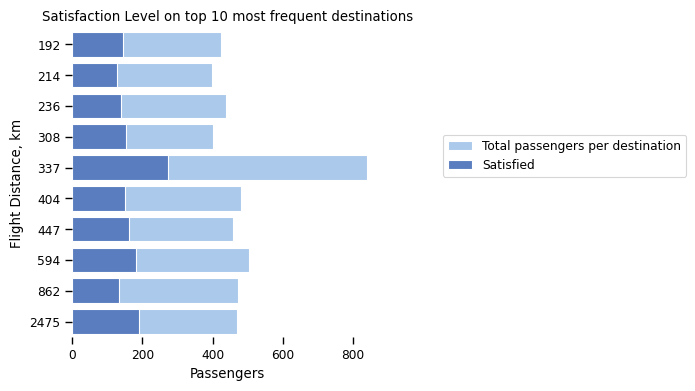

In [523]:
f, ax = plt.subplots(figsize=(4, 4))
sns.set_color_codes('pastel')
ax = sns.barplot( x='Total', y=top_10_distances.index, data=top_10_distances,
            label='Total passengers per destination', color='b', edgecolor='w',  orient = 'h')
sns.set_color_codes('muted')
sns.barplot( x='satisfied', y=top_10_distances.index, data=top_10_distances,
            label='Satisfied', color='b', edgecolor='w',  orient = 'h')
ax.legend(ncol=1, loc='lower right', bbox_to_anchor=(2, 0.5))
sns.despine(left=True, bottom=True)
plt.xlabel('Passengers')
plt.ylabel('Flight Distance, km')
plt.title('Satisfaction Level on top 10 most frequent destinations');

No, happiness does not depend much on a distance travelled.

#### Age distribution

In [524]:
bins = pd.IntervalIndex.from_tuples([(0, 17), (18, 34), (35, 54), (55, 100)])
ages = pd.DataFrame(pd.cut(df['Age'], bins).value_counts().sort_index())

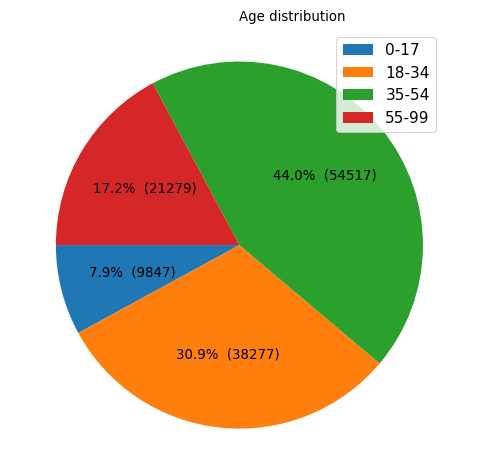

In [525]:
title = plt.title('Age distribution')
title.set_ha("left")
plt.gca().axis("equal")
pie = plt.pie(ages['Age'], autopct=lambda p : '{:.1f}%  ({:.0f})'.format(p,p * sum(ages['Age'])/100), startangle=180)
labels=["0-17", "18-34", "35-54", "55-99"]
plt.legend(pie[0],labels, bbox_to_anchor=(0.7,0.7), loc="lower right", fontsize=11, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.45)
plt.tight_layout()

We see that as many as nearly 10000 people from the survey are actually under 18. 

So how they can even fully evaluate provided services or to be acknowledged of the lack of it?..

Let's dive deeper and discover how satisfaction is distributed across the age groups.

In [526]:
# Create a new column "Age_range" vith values from 'Age' column
condlist = [df['Age'].between(0,18), df['Age'].between(19,34), df['Age'].between(35,54), df['Age'].between(55,100)]
choicelist = ['minor', '18-34', '35-54', '55-100']
df['Age_range'] = np.select(condlist, choicelist)

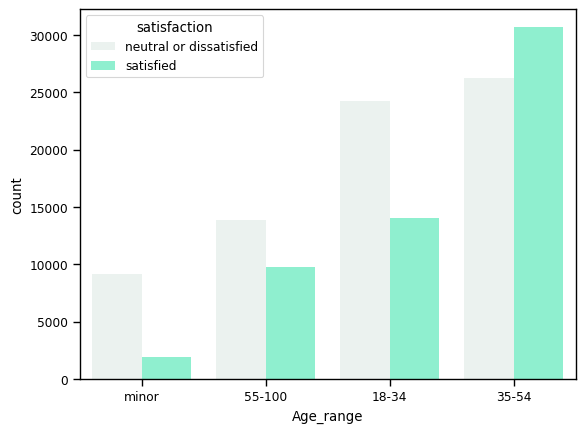

In [527]:
sns.countplot(data=df, x='Age_range', hue='satisfaction', color='aquamarine', 
              order = df['Age_range'].value_counts(ascending=True).index)
plt.show()

As per now, there are no many obvious traits to detect the outcome of customers journey.<br> We discovered that Business class passengers are mainly happy, meanwhile there are no other obvious correlations. <br> Let's build a Machine Learning model that will enlighten us on what really does matter.

# 3. Encoding

Drop the columns with features on which flight company can not influence directly.

In [624]:
df_final = df.drop(['Gender', 'Age_range', 'Class', 'Type of Travel', 'Customer Type'], axis=1)

In [625]:
df_final['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [626]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   Age                                129880 non-null  int64
 1   Flight Distance                    129880 non-null  int64
 2   Inflight wifi service              129880 non-null  int64
 3   Departure/Arrival time convenient  129880 non-null  int64
 4   Ease of Online booking             129880 non-null  int64
 5   Gate location                      129880 non-null  int64
 6   Food and drink                     129880 non-null  int64
 7   Online boarding                    129880 non-null  int64
 8   Seat comfort                       129880 non-null  int64
 9   Inflight entertainment             129880 non-null  int64
 10  On-board service                   129880 non-null  int64
 11  Leg room service                   129880 non-null  int64
 12  Bag

In [627]:
# Extract features matrix and target column

y = df_final['satisfaction']
X = df_final.drop('satisfaction', axis = 1)

In [628]:
# Subdivision of the dataset onto train, validation and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=20000, random_state=42)

In [629]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((89880, 18), (20000, 18), (20000, 18), (89880,), (20000,), (20000,))

Now as we have the dataset divided on **train** (X_train, y_train), **validation** (X_val, y_val) and **test** (X_test, y_test)
we can train different models.

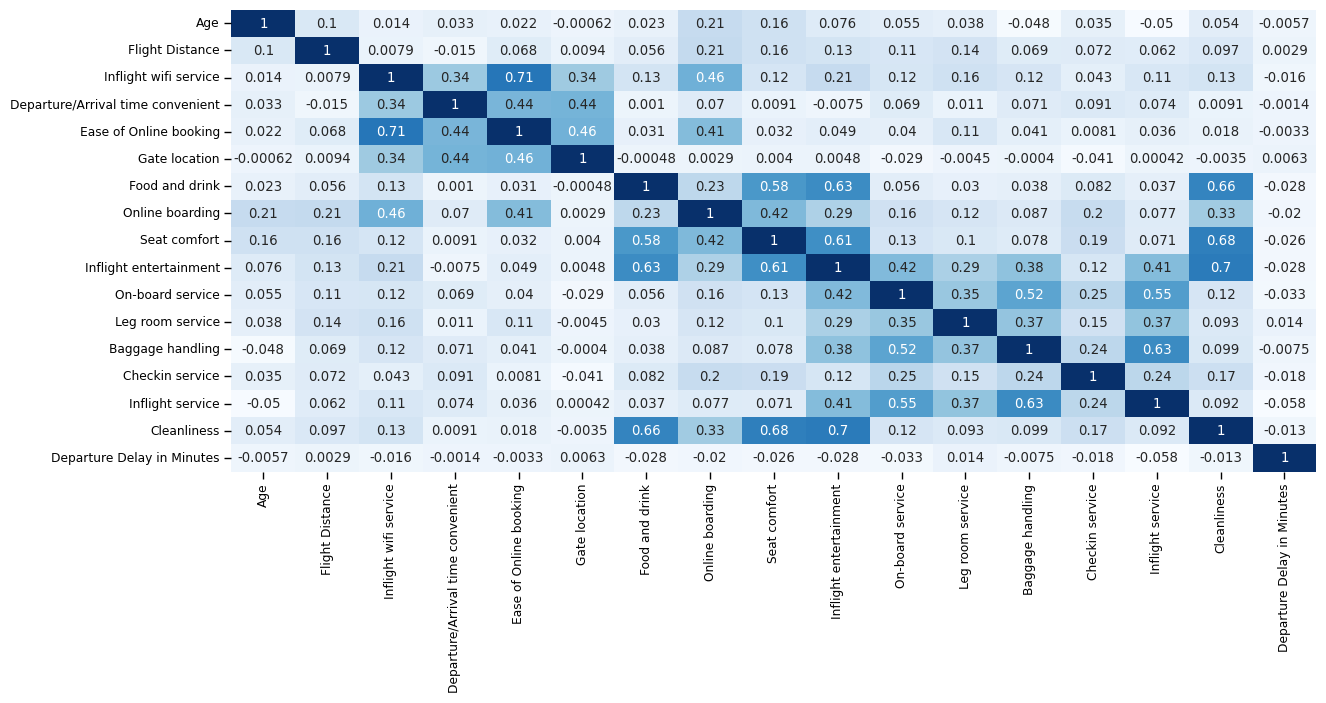

In [561]:
plt.figure(figsize=(14,6))
sns.heatmap(X_train.corr(method='pearson'),
            annot=True,
            cbar=False,
            cmap='Blues')
plt.show()

In [630]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# 4. Model implementation

Our prediction problem, either a customer is satisfied or not, is a binary classification problem, therefore we will handle it with different Classifiers. <br><br>
*Metrics of model evaluation:* in this case the appropriate metrics are Precision and Accuracy.<br><br>
**Precision** because we deal with the business problem where the instance, falsely categorised as positive, has way greater business loss than that of an actual positive falsely labelled as negative.<br>
**Accuracy** is also a good metric in this case because classes are well-balanced and yes, it is important to see how model correctly assigns labels overall, both negatives and positives.

Let's build a few models, and based on its' performance choose two best. Then tune its' hyperparameters for better performance and unite them with Ensemble method in one model.

#### 1. Decision Tree Classifier

In [566]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_val)
print(f'Classification report: \n{classification_report(y_val, y_pred_dt)}')

Classification report: 
                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.93      0.93     11257
              satisfied       0.91      0.92      0.91      8743

               accuracy                           0.92     20000
              macro avg       0.92      0.92      0.92     20000
           weighted avg       0.92      0.92      0.92     20000



In [578]:
acc_dt = accuracy_score(y_val, y_pred_dt)
print(f"Accuracy Score DecisionTreeClassifier: {acc_dt:.4f}")

Accuracy Score DesicionTreeClassifier: 0.9242


#### 2. K-Nearest Neighbor

In [734]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_val)
print(f'Classification report: \n{classification_report(y_val, y_pred_knn)}')

Classification report: 
              precision    recall  f1-score   support

           0       0.75      0.80      0.78     11257
           1       0.72      0.66      0.69      8743

    accuracy                           0.74     20000
   macro avg       0.74      0.73      0.73     20000
weighted avg       0.74      0.74      0.74     20000



In [738]:
acc_knn = accuracy_score(y_val, y_pred_knn)
print(f"Accuracy Score KNN Classifier: {acc_knn:.4f}")

Accuracy Score KNN Classifier: 0.7385


In [739]:
print(f"KNN Train accuracy is {knn.score(X_train, y_train):.2f}")
print(f"KNN Validation accuracy is {knn.score(X_val, y_val):.2f}")

KNN Train accuracy is 0.83
KNN Validation accuracy is 0.74


#### 3. Random Forest Classifier

In [636]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     11257
           1       0.96      0.93      0.94      8743

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000

Wall time: 12.4 s


#### RandomForest model evaluation

In [653]:
print(f'Classification report: \n{classification_report(y_val, y_pred_rf)}')

Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     11257
           1       0.96      0.93      0.94      8743

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [737]:
acc_rf = accuracy_score(y_val, y_pred_rf)
print(f"Accuracy Score RandomForest: {acc_rf:.4f}")

Accuracy Score RandomForest: 0.9496


In [654]:
print(f"Random Forest Train accuracy is {rf.score(X_train, y_train):.2f}")
print(f"Random Forest Validation accuracy is {rf.score(X_val, y_val):.2f}")

Random Forest Train accuracy is 1.00
Random Forest Validation accuracy is 0.95


We can see that there is a slight overfit by comparing train and val accuracy.

#### 4. XGBoost Classifier

In [728]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)

#### XGBoost model evaluation

In [729]:
print(f'Classification report: \n{classification_report(y_val, y_pred_xgb)}')

Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11257
           1       0.95      0.93      0.94      8743

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [730]:
print(f"Train accuracy XGBoost is {xgb.score(X_train, y_train):.2f}")
print(f"Validation accuracy XGBoost is {xgb.score(X_val, y_val):.2f}") 

Train accuracy XGBoost is 0.96
Validation accuracy XGBoost is 0.95


In [733]:
acc_xg = accuracy_score(y_val, y_pred_xgb)
print(f"Accuracy Score XGBoost: {acc_xg:.4f}")

Accuracy Score KNN Classifier: 0.9506


Almost no overfitting! Great.

#### 5. CatBoost Classifier

In [775]:
%%time
catb = CatBoostClassifier()
catb.fit(X_train, y_train)
y_pred_cb = catb.predict(X_val)
print(f'Classification report: \n{classification_report(y_val, y_pred_cb)}')

Learning rate set to 0.070331
0:	learn: 0.6173991	total: 30.2ms	remaining: 30.2s
1:	learn: 0.5477160	total: 61.2ms	remaining: 30.5s
2:	learn: 0.4982668	total: 91.3ms	remaining: 30.3s
3:	learn: 0.4581909	total: 122ms	remaining: 30.3s
4:	learn: 0.4210185	total: 152ms	remaining: 30.2s
5:	learn: 0.3962880	total: 182ms	remaining: 30.2s
6:	learn: 0.3765642	total: 213ms	remaining: 30.1s
7:	learn: 0.3514816	total: 242ms	remaining: 30.1s
8:	learn: 0.3360557	total: 274ms	remaining: 30.2s
9:	learn: 0.3220246	total: 305ms	remaining: 30.2s
10:	learn: 0.3114381	total: 336ms	remaining: 30.2s
11:	learn: 0.3022758	total: 368ms	remaining: 30.3s
12:	learn: 0.2936546	total: 401ms	remaining: 30.5s
13:	learn: 0.2874150	total: 432ms	remaining: 30.4s
14:	learn: 0.2816955	total: 462ms	remaining: 30.4s
15:	learn: 0.2766713	total: 492ms	remaining: 30.3s
16:	learn: 0.2708560	total: 523ms	remaining: 30.3s
17:	learn: 0.2654635	total: 554ms	remaining: 30.2s
18:	learn: 0.2600981	total: 585ms	remaining: 30.2s
19:	lear

In [776]:
acc_cb = accuracy_score(y_val, y_pred_cb)
print(f"Accuracy Score CatBoost: {acc_cb:.4f}")

Accuracy Score CatBoost: 0.9536


In [777]:
print(f"CatBoost Train accuracy is {catb.score(X_train, y_train):.2f}")
print(f"CatBoost Validation accuracy is {catb.score(X_val, y_val):.2f}")

CatBoost Train accuracy is 0.96
CatBoost Validation accuracy is 0.95


Almost no overfitting as well.

# 5. Hyperparameters tuning

I select 3 models with the best performance, and then tune their hyperparameters before passing models to an Ensemble algorithm. <br> 
Our 3 algorithms that shown best results are: **RandomForest, XGBoost and CatBoost.** <br>
Despite there is no evident overfitting for CatBoost and XGBoost, we will anyway fine-tune hyperparameters to capture better the underlying patterns in the data, which will definitely result in better performance on unseen data.

### RandomForest RandomSearch

RandomSearch is a technique used for hyperparameters optimisation. It randomly samples a subset of hyperparameter combinations from a given search space.

In [656]:
%%time
# Define the parameter grid

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
} 

Wall time: 0 ns


In [660]:
#EXECUTION TIME: 15'

# Create a Random Forest Classifier
rf_tuned = RandomForestClassifier()

# Init Random Search
rnd_cv = RandomizedSearchCV(rf_tuned, param_grid, n_jobs=-1, cv=7, scoring="accuracy")

# Fit the model
rnd_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='accuracy')

In [680]:
y_pred_rf_cv = rnd_cv.predict(X_val)
best_rf = rnd_cv.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=60, n_estimators=1600)

In [670]:
# Print the best parameters and corresponding score
print("Best Parameters:", rnd_cv.best_params_)
print("Best Score:", rnd_cv.best_score_)
print(f'Classification report: \n{classification_report(y_val, y_pred_rf_cv)}')

Best Parameters: {'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 60, 'bootstrap': False}
Best Score: 0.9497218513573653
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11257
           1       0.96      0.93      0.94      8743

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [742]:
acc_rf_cv = accuracy_score(y_val, y_pred_rf_cv)
print(f"Accuracy Score RandomForest Tuned: {acc_rf_cv:.4f}")

Accuracy Score RandomForest: 0.9510


We can observe that preformance of the RandomForest model has a very slight improvement after hyperparameters tuning 🤔 

**Second attempt of RF hyperparameters tuning, after observing the Best Parameters Report:**

In [827]:
# Define the parameter grid

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 1900, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 700, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]
# Method of selecting samples for training each tree
bootstrap = [False]
# Create the random grid
param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
} 

# Best Parameters form previous RFC model:
# {'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 60, 'bootstrap': False}

In [828]:
%%time
#EXECUTION TIME: 26'

# Create another instance of Random Forest Classifier
rf_tuned2 = RandomForestClassifier()

# Init Random Search
rnd_cv2 = RandomizedSearchCV(rf_tuned2, param_grid, n_jobs=-1, cv=5, scoring="accuracy")

# Fit the model
rnd_cv2.fit(X_train, y_train)

Wall time: 26min 18s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [False],
                                        'max_depth': [10, 79, 148, 217, 286,
                                                      355, 424, 493, 562, 631,
                                                      700, None],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 5, 7],
                                        'n_estimators': [300, 477, 655, 833,
                                                         1011, 1188, 1366, 1544,
                                                         1722, 1900]},
                   scoring='accuracy')

In [829]:
y_pred_rf_tuned2 = rnd_cv2.predict(X_val)
best_rf2 = rnd_cv2.best_estimator_

In [830]:
# Print the best parameters and corresponding score
print("Best Parameters:", rnd_cv2.best_params_)
print("Best Score:", rnd_cv2.best_score_)
print(f'Classification report: \n{classification_report(y_val, y_pred_rf_tuned2)}')

Best Parameters: {'n_estimators': 1011, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_depth': 217, 'bootstrap': False}
Best Score: 0.949076546506453
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11257
           1       0.96      0.93      0.94      8743

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [838]:
acc_rf_tuned2 = accuracy_score(y_val, y_pred_rf_tuned2)
print(f"Accuracy Score RandomForest 2nd Attempt Tuned: {acc_rf_tuned2:.4f}")

Accuracy Score RandomForest 2nd Attempt Tuned: 0.9509


This second tuning attempt shows slightly lower performance comparing to the 1st tuning attempt.

### XGBoost RandomSearch

In [700]:
# Hyperparameter space grid

hparam_grid = {
    # booster type to use in the gradient boosting algorithm:
    "booster": ["gbtree", "gblinear"],
    # maximum depth of each decision tree in the boosting process:
    "max_depth": [5, 7, 10],
    # step size at each boosting iteration:
    "learning_rate": [0.2, 0.1, 0.05],
    # eta is similar to the learning rate and controls the step size:
    "eta": [0.1, 0.5, 0.75],
    # L2 regularization term on the weights, with and without regularization:
    "reg_lambda": [0, 3],
    # fraction of columns to be randomly selected for each tree:
    "colsample_bytree": [0.5, 0.7, 0.8],
}

In [701]:
%%time  ##EXECUTION TIME 19'30''

xgb_clf = xgb.XGBClassifier()
rnd_cv_xg = RandomizedSearchCV(xgb_clf, param_grid, n_jobs=-1, cv=5, scoring="accuracy")

# Fit
rnd_cv_xg.fit(X_train, y_train)

[22:50:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } are not used.

Wall time: 19min 31s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                         

In [702]:
y_pred_cv_xg = rnd_cv_xg.predict(X_val)
best_xg = rnd_cv_xg.best_estimator_

In [703]:
# Print the best parameters and corresponding score
print("Best Parameters:", rnd_cv_xg.best_params_)
print("Best Score:", rnd_cv_xg.best_score_)
print(f'Classification report: \n{classification_report(y_val, y_pred_cv_xg)}')

Best Parameters: {'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': False}
Best Score: 0.950255896751224
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11257
           1       0.95      0.94      0.95      8743

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [743]:
acc_cv_xg = accuracy_score(y_val, y_pred_cv_xg)
print(f"Accuracy Score XGBoost RandSearch: {acc_cv_xg:.4f}")

Accuracy Score XGBoost RandSearch: 0.9524


After hyperparameters tuning the performance of the XGBoost has not improved.

**Second attempt** of the XGBoost hyperparameters tuning:

In [835]:
# Hyperparameter space grid

hparam_grid = {
    # booster type to use in the gradient boosting algorithm:
    "booster": ["gbtree", "gblinear"],
    # maximum depth of each decision tree in the boosting process:
    "max_depth": [5, 10, 12],
    # step size at each boosting iteration:
    "learning_rate": [0.2, 0.1, 0.05],
    # fraction of columns to be randomly selected for each tree:
    "colsample_bytree": [0.5, 0.7, 0.8],
    # Method of selecting samples for training each tree
    'bootstrap': [False],
    # Minimum number of samples required to split a node
    'min_samples_split': [2, 5, 7],
     # Minimum number of samples required at each leaf node
    'min_samples_leaf': [1, 3, 5]
}
# Best Parameters from previous model:
# {'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': False}

In [837]:
%%time 
##EXECUTION TIME 23'18''

xgb_clf2 = xgb.XGBClassifier()
rnd_cv_xg2 = RandomizedSearchCV(xgb_clf2, param_grid, n_jobs=-1, cv=5, scoring="accuracy")

# Fit
rnd_cv_xg2.fit(X_train, y_train)

[20:57:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } are not used.

Wall time: 23min 18s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                         

In [839]:
y_pred_cv_xg2 = rnd_cv_xg2.predict(X_val)
best_xg2 = rnd_cv_xg2.best_estimator_

In [840]:
# Print the best parameters and corresponding score
print("Best Parameters:", rnd_cv_xg2.best_params_)
print("Best Score:", rnd_cv_xg2.best_score_)
print(f'Classification report: \n{classification_report(y_val, y_pred_cv_xg2)}')

Best Parameters: {'n_estimators': 477, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 217, 'bootstrap': False}
Best Score: 0.9498664886515353
Classification report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11257
           1       0.95      0.94      0.94      8743

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [841]:
acc_cv_xg2 = accuracy_score(y_val, y_pred_cv_xg2)
print(f"Accuracy Score XGBoost RandSearch: {acc_cv_xg2:.4f}")

Accuracy Score XGBoost RandSearch: 0.9515


Outcome: Performance of the XGBoost model after this round of hyperparameter tuning has slightly decreased.

### CatBoost RandomSearch

In [842]:
# Hyperparameter space grid

params = {
    'iterations': [20, 50, 100],         # number of boosting iterations or trees in the ensemble
    'learning_rate': [0.1, 0.01, 0.2],   # step size at each boosting iteration
    'depth': [3, 7, 10],                 # maximum depth of the trees in the ensemble
    'l2_leaf_reg': [0, 0.25, 0.5, 1],    # L2 regularization term on the weights
}

In [716]:
%%time  
##EXECUTION TIME

cat_clf = CatBoostClassifier()
rnd_cv_cat = RandomizedSearchCV(cat_clf, params, n_jobs=-1, cv=5, scoring="accuracy")
rnd_cv_cat.fit(X_train, y_train)

0:	learn: 0.5711861	total: 12.4ms	remaining: 1.23s
1:	learn: 0.4881352	total: 22.2ms	remaining: 1.09s
2:	learn: 0.4298138	total: 31.6ms	remaining: 1.02s
3:	learn: 0.3832169	total: 40.8ms	remaining: 979ms
4:	learn: 0.3506046	total: 49.5ms	remaining: 940ms
5:	learn: 0.3231701	total: 57.8ms	remaining: 905ms
6:	learn: 0.3039969	total: 66.3ms	remaining: 881ms
7:	learn: 0.2852211	total: 74.2ms	remaining: 854ms
8:	learn: 0.2681303	total: 81.9ms	remaining: 828ms
9:	learn: 0.2567145	total: 89.5ms	remaining: 805ms
10:	learn: 0.2453929	total: 96.9ms	remaining: 784ms
11:	learn: 0.2379371	total: 104ms	remaining: 766ms
12:	learn: 0.2307896	total: 112ms	remaining: 749ms
13:	learn: 0.2231368	total: 120ms	remaining: 738ms
14:	learn: 0.2174924	total: 128ms	remaining: 723ms
15:	learn: 0.2106944	total: 135ms	remaining: 710ms
16:	learn: 0.2061742	total: 144ms	remaining: 703ms
17:	learn: 0.2023585	total: 152ms	remaining: 693ms
18:	learn: 0.1992600	total: 161ms	remaining: 687ms
19:	learn: 0.1934934	total: 16

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000002030E4E97C0>,
                   n_jobs=-1,
                   param_distributions={'depth': [3, 7, 10],
                                        'iterations': [20, 50, 100],
                                        'l2_leaf_reg': [0, 0.25, 0.5, 1],
                                        'learning_rate': [0.1, 0.01, 0.2]},
                   scoring='accuracy')

In [717]:
y_pred_cv_cat = rnd_cv_cat.predict(X_val)
best_cat = rnd_cv_cat.best_estimator_

In [719]:
# Print the best parameters and corresponding score
print("Best Parameters:", rnd_cv_cat.best_params_)
print("Best Score:", rnd_cv_cat.best_score_)
print(f'Classification report tuned CatBoost: \n{classification_report(y_val, y_pred_cv_cat)}')

Best Parameters: {'learning_rate': 0.2, 'l2_leaf_reg': 0.25, 'iterations': 100, 'depth': 7}
Best Score: 0.9469069870939031
Classification report tuned CatBoost: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11257
           1       0.95      0.93      0.94      8743

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [749]:
acc_cv_cat = accuracy_score(y_val, y_pred_cv_cat)
print(f"Accuracy Score CatBoost RandSearch: {acc_cv_cat:.4f}")

Accuracy Score CatBoost RandSearch: 0.9491


Resume: CatBoost model performance has not improved after hyperparameters tuning.

**Second attempt**  CatBoost Hyperparameters tuning:

In [843]:
# Hyperparameter space grid

params = {
    'iterations': [50, 90, 120],         # number of boosting iterations or trees in the ensemble
    'learning_rate': [0.1, 0.2, 0.3],   # step size at each boosting iteration
    'depth': [5, 7, 9, 12],                 # maximum depth of the trees in the ensemble
    'l2_leaf_reg': [0, 0.25, 0.5, 1],    # L2 regularization term on the weights
}
# Best Parameters from previous model: {'learning_rate': 0.2, 'l2_leaf_reg': 0.25, 'iterations': 100, 'depth': 7}

In [844]:
%%time  
##EXECUTION TIME

cat_clf2 = CatBoostClassifier()
rnd_cv_cat2 = RandomizedSearchCV(cat_clf2, params, n_jobs=-1, cv=5, scoring="accuracy")
rnd_cv_cat2.fit(X_train, y_train)

0:	learn: 0.5101906	total: 16.9ms	remaining: 2.01s
1:	learn: 0.4115733	total: 34.1ms	remaining: 2.01s
2:	learn: 0.3499234	total: 51ms	remaining: 1.99s
3:	learn: 0.3016584	total: 68.6ms	remaining: 1.99s
4:	learn: 0.2685136	total: 85.9ms	remaining: 1.98s
5:	learn: 0.2456726	total: 103ms	remaining: 1.95s
6:	learn: 0.2273778	total: 119ms	remaining: 1.93s
7:	learn: 0.2150102	total: 136ms	remaining: 1.9s
8:	learn: 0.2057750	total: 154ms	remaining: 1.9s
9:	learn: 0.1965447	total: 169ms	remaining: 1.86s
10:	learn: 0.1881998	total: 185ms	remaining: 1.83s
11:	learn: 0.1787035	total: 200ms	remaining: 1.8s
12:	learn: 0.1743312	total: 215ms	remaining: 1.77s
13:	learn: 0.1704919	total: 233ms	remaining: 1.76s
14:	learn: 0.1659920	total: 251ms	remaining: 1.76s
15:	learn: 0.1607453	total: 267ms	remaining: 1.73s
16:	learn: 0.1550078	total: 282ms	remaining: 1.71s
17:	learn: 0.1508324	total: 298ms	remaining: 1.69s
18:	learn: 0.1488518	total: 313ms	remaining: 1.66s
19:	learn: 0.1456216	total: 328ms	remaini

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000020396E89EB0>,
                   n_jobs=-1,
                   param_distributions={'depth': [5, 7, 9, 12],
                                        'iterations': [50, 90, 120],
                                        'l2_leaf_reg': [0, 0.25, 0.5, 1],
                                        'learning_rate': [0.1, 0.2, 0.3]},
                   scoring='accuracy')

In [845]:
y_pred_cv_cat2 = rnd_cv_cat2.predict(X_val)
best_cat2 = rnd_cv_cat2.best_estimator_

In [846]:
# Print the best parameters and corresponding score
print("Best Parameters:", rnd_cv_cat2.best_params_)
print("Best Score:", rnd_cv_cat2.best_score_)
print(f'Classification report 2nd attempt tuned CatBoost: \n{classification_report(y_val, y_pred_cv_cat2)}')

Best Parameters: {'learning_rate': 0.3, 'l2_leaf_reg': 0.5, 'iterations': 120, 'depth': 9}
Best Score: 0.9506898086337339
Classification report 2nd attempt tuned CatBoost: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11257
           1       0.95      0.94      0.94      8743

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [847]:
acc_cv_cat2 = accuracy_score(y_val, y_pred_cv_cat2)
print(f"Accuracy Score CatBoost RandSearch: {acc_cv_cat2:.4f}")

Accuracy Score CatBoost RandSearch: 0.9516


Resume: after 2nd attempt of params optimisation CatBoost has not improved :(

# 6. Models effectiveness comparison

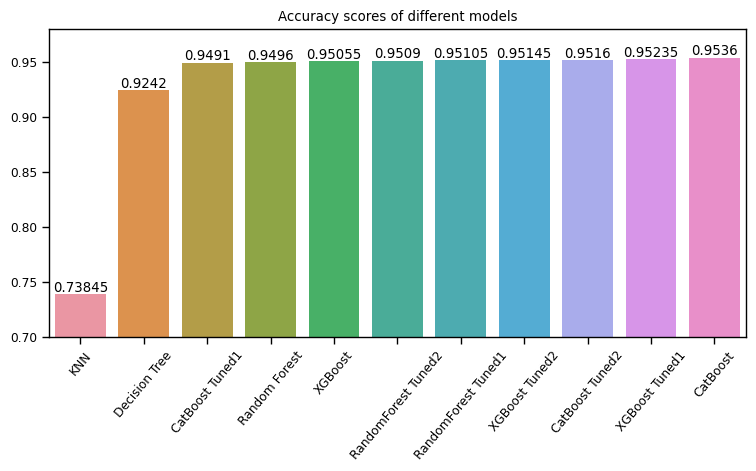

In [865]:
models = ['Decision Tree','KNN','Random Forest', 'XGBoost', 'CatBoost', 
          'RandomForest Tuned1', 'XGBoost Tuned1', 'CatBoost Tuned1', 
          'RandomForest Tuned2', 'XGBoost Tuned2', 'CatBoost Tuned2']
acc = [acc_dt, acc_knn, acc_rf, acc_xgb, acc_cb, acc_rf_cv, acc_cv_xg, acc_cv_cat, acc_rf_tuned2, acc_cv_xg2, acc_cv_cat2]
df = pd.DataFrame({'Classifier': models, 'Accuracy': acc})
plt.figure(figsize=(9, 4))
ax = sns.barplot(models, acc, order=df.sort_values('Accuracy').Classifier)
plt.tick_params(axis = 'x', labelrotation=50)
plt.title('Accuracy scores of different models')
plt.ylim(0.70, 0.98)
ax.bar_label(ax.containers[0]);

# 7. Model Ensemble: Voting Classifier (method - Soft Voting)

We create a meta model uniting RandomForest, XGBoost and CatBoost models.

In [779]:
ensemble_model = VotingClassifier(estimators=[('rf', rf_tuned),('xgb', xgb_clf),('cb', catb)], voting='soft')
ensemble_model.fit(X_train, y_train)

Learning rate set to 0.070331
0:	learn: 0.6173991	total: 19.1ms	remaining: 19.1s
1:	learn: 0.5477160	total: 38ms	remaining: 18.9s
2:	learn: 0.4982668	total: 57.9ms	remaining: 19.2s
3:	learn: 0.4581909	total: 78.8ms	remaining: 19.6s
4:	learn: 0.4210185	total: 98.7ms	remaining: 19.6s
5:	learn: 0.3962880	total: 122ms	remaining: 20.2s
6:	learn: 0.3765642	total: 145ms	remaining: 20.6s
7:	learn: 0.3514816	total: 169ms	remaining: 20.9s
8:	learn: 0.3360557	total: 192ms	remaining: 21.2s
9:	learn: 0.3220246	total: 217ms	remaining: 21.5s
10:	learn: 0.3114381	total: 243ms	remaining: 21.8s
11:	learn: 0.3022758	total: 266ms	remaining: 21.9s
12:	learn: 0.2936546	total: 289ms	remaining: 22s
13:	learn: 0.2874150	total: 312ms	remaining: 22s
14:	learn: 0.2816955	total: 335ms	remaining: 22s
15:	learn: 0.2766713	total: 358ms	remaining: 22s
16:	learn: 0.2708560	total: 381ms	remaining: 22.1s
17:	learn: 0.2654635	total: 404ms	remaining: 22s
18:	learn: 0.2600981	total: 427ms	remaining: 22s
19:	learn: 0.2548084

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interact...
                                            learning_rate=None, max_bin=None,
        

In [780]:
y_pred_final = ensemble_model.predict(X_val)
print(f'Classification report: Final Ensemble Method \n{classification_report(y_val, y_pred_final)}')

Classification report: Final Ensemble Method 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11257
           1       0.96      0.94      0.95      8743

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [871]:
acc_final = accuracy_score(y_val, y_pred_final)
print(f"Accuracy Score ENSEMBLE: {acc_final:.4f}")

Accuracy Score ENSEMBLE: 0.9536


OOok, on the Ensemble model our performance has finaly increased!! 🎉 🎉 🎉 

# 8. Feature importance

In [796]:
# Initialize an empty list to store feature importances from each model
feature_importances = []

# Get feature importances from each model
for name, model in ensemble_model.named_estimators_.items():
    if hasattr(model, 'feature_importances_'):
        feature_importances.append(model.feature_importances_)

# Compute the average feature importance across the ensemble
average_importances = np.mean(feature_importances, axis=0)

feature_names = X_train.columns

sorted_indices = np.argsort(average_importances)[::-1]
sorted_importances = average_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

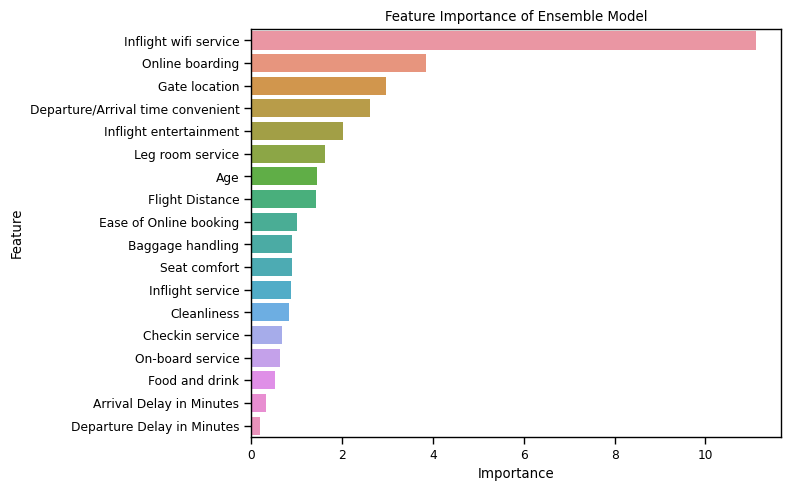

In [867]:
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_importances, y=sorted_feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Ensemble Model')
plt.tight_layout()

##   Resume:

Comes out, the things that make passengers happier are (quite predictable): <br>
1. **wi-fi during the flight** (no annoyed children or teens, adults can keep doing business)
2. **online boarding pass** - less queues - happier the passenger!
3. **gate location** - again, less efforts - happier the passenger

Unexpectedly come in the tail delays and food service. Baggage handling, that at the beginning seemed to be a promising feature, does not actually change the story: it's average rating is only 1,5 out of 10.

# 9. Final model: test fitting and performance evaluation

In [868]:
predictions = ensemble_model.predict(X_test)

In [869]:
print(f'Classification report: Ensemble Method on TEST set\n{classification_report(y_test, predictions)}')

Classification report: Ensemble Method on TEST set
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11361
           1       0.96      0.93      0.94      8639

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [872]:
acc_test = accuracy_score(y_test, predictions)
print(f"Accuracy Score TEST: {acc_test:.4f}")

Accuracy Score TEST: 0.9508


It's a good score :)